# Analysis Notebook
Code written to analyse performance of system

In [1]:
import pandas as pd
from analysis.utils import best, plot, plt_comparison

In [34]:
# read uniform data
all_data_uni = pd.read_csv('all_data_uniform.tsv', sep='\t')

all_data_uni['idle_time'] =  all_data_uni['idle_time'] /3
all_data_uni['idle_time_interval'] =  all_data_uni['idle_time_interval'] /3

Overall plots for uniform

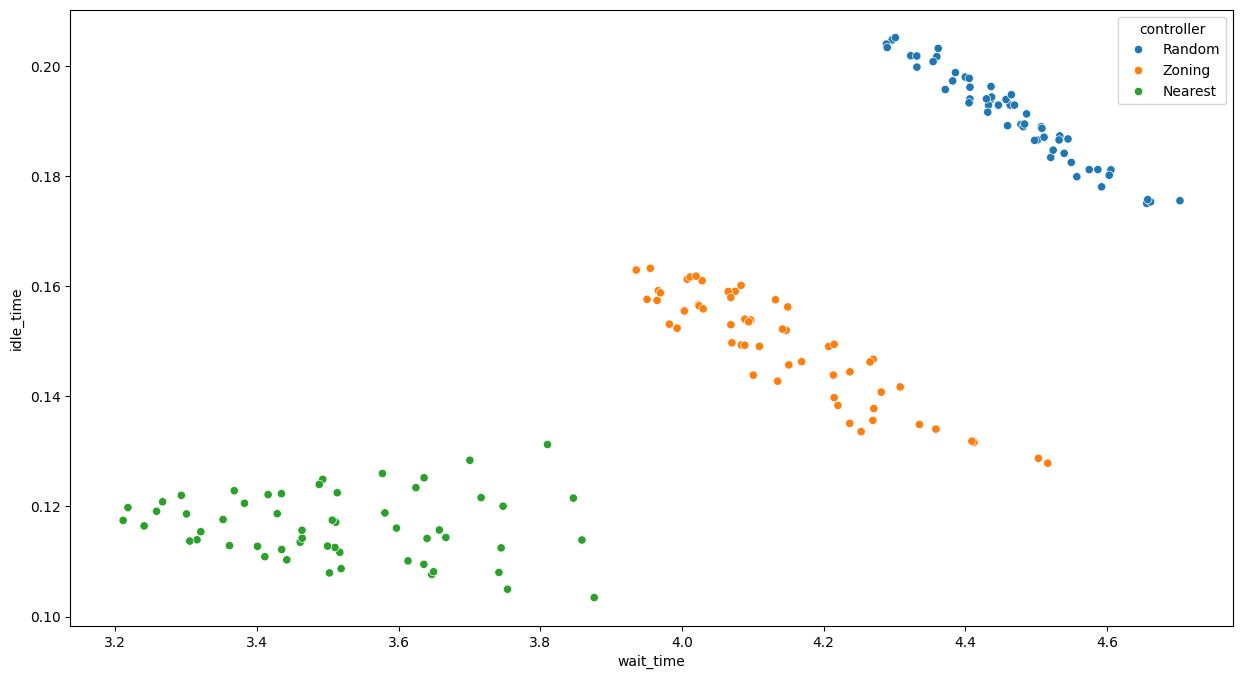

In [35]:
plot(all_data_uni,"overall_plot_uniform")

Best Idle Configuration

In [36]:
best_configuration = best(all_data_uni, 'idle_floor_config')
best_configuration[0]

Best idle_floor_config: (3, 3, 4)


,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
93,Random,"(3, 3, 4)",200,4.301266,0.035940,0.205093,0.004137,4.337205
94,Zoning,"(3, 3, 4)",192,4.083464,0.031577,0.160110,0.004202,4.115040
95,Nearest,"(3, 3, 4)",375,3.211126,0.030361,0.117448,0.003841,3.241487


Best controller

Best controller: Nearest


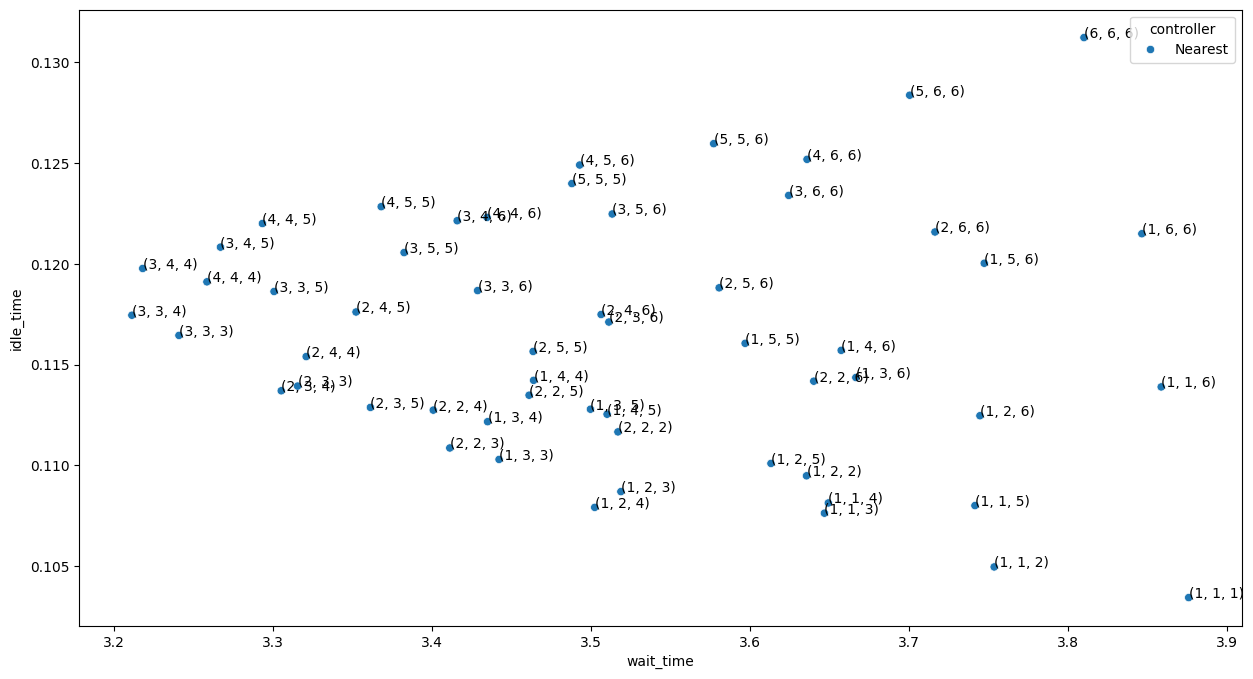

In [37]:
best_controller = best(all_data_uni, 'controller')
best_controller_data = all_data_uni.loc[all_data_uni['controller'] == best_controller[1]]
plot(best_controller_data, 'best_controller_plot_uniform', True)

In [38]:
best_controller[0].head()

,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
2,Nearest,"(2, 2, 2)",354,3.516983,0.028534,0.111660,0.003661,3.545517
5,Nearest,"(3, 5, 6)",334,3.513374,0.033789,0.122472,0.003842,3.547163
8,Nearest,"(1, 6, 6)",286,3.846667,0.032047,0.121493,0.003681,3.878714
11,Nearest,"(2, 2, 5)",332,3.461077,0.030802,0.113480,0.003534,3.491879
14,Nearest,"(4, 4, 4)",398,3.258347,0.031225,0.119106,0.003734,3.289572


Overall plots for ground heavy

In [39]:
# read ground heavy data
all_data_gh = pd.read_csv('all_data_groundheavy.tsv', sep='\t')

all_data_gh['idle_time'] =  all_data_gh['idle_time'] /3
all_data_gh['idle_time_interval'] =  all_data_gh['idle_time_interval'] /3

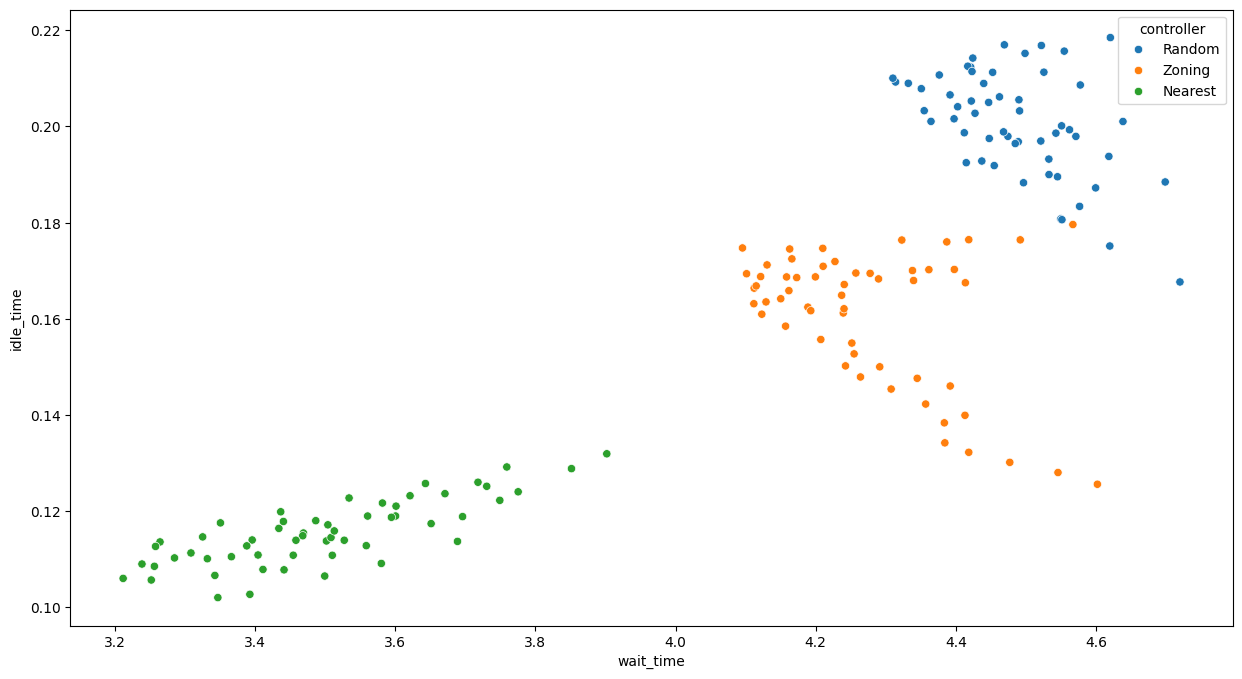

In [40]:
plot(all_data_gh,"overall_plot_ground")

Best Idle Configuration

In [41]:
best_configuration = best(all_data_gh, 'idle_floor_config')
best_configuration[0]

Best idle_floor_config: (3, 3, 3)


,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
147,Random,"(3, 3, 3)",127,4.310278,0.033796,0.210035,0.004506,4.344075
148,Zoning,"(3, 3, 3)",148,4.257410,0.027914,0.169522,0.004222,4.285324
149,Nearest,"(3, 3, 3)",310,3.211491,0.028671,0.106031,0.003626,3.240163


Best controller

Best controller: Nearest


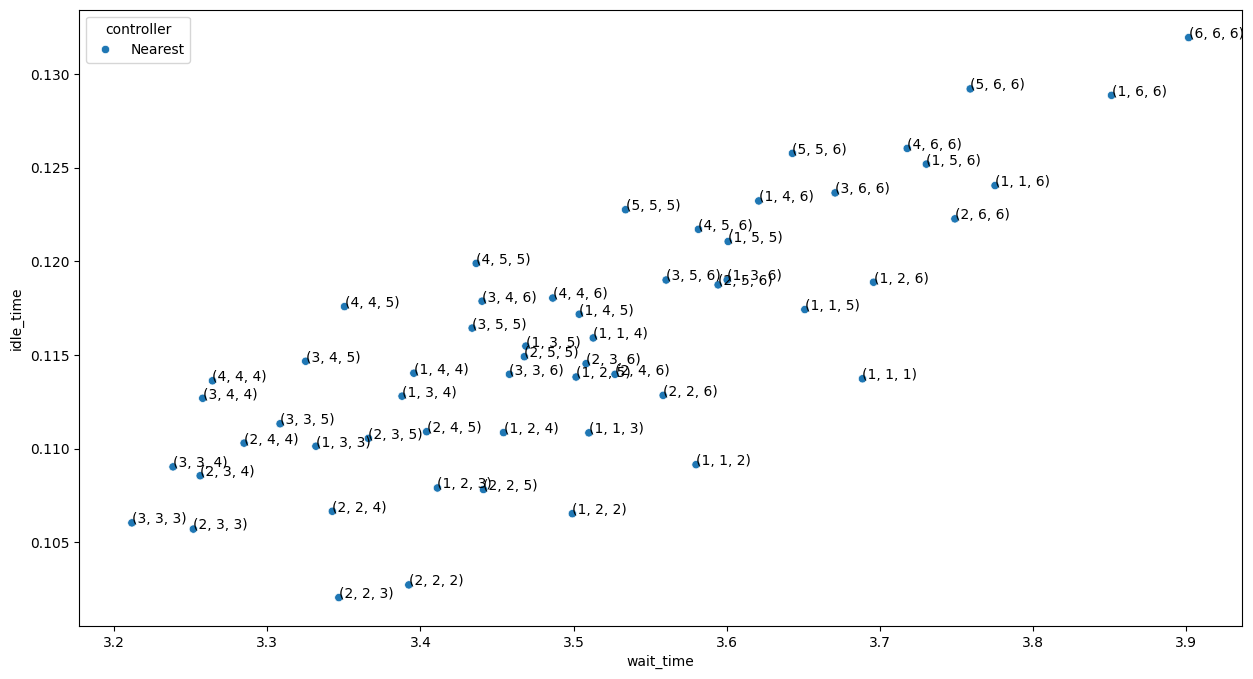

In [42]:
best_controller = best(all_data_gh, 'controller')
best_controller_data = all_data_gh.loc[all_data_gh['controller'] == best_controller[1]]
plot(best_controller_data, 'best_controller_plot_ground', True)

In [43]:
best_controller[0].head()

,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
2,Nearest,"(2, 2, 2)",295,3.392406,0.028961,0.102720,0.003760,3.421367
5,Nearest,"(3, 5, 6)",267,3.560500,0.030808,0.118996,0.003727,3.591308
8,Nearest,"(1, 6, 6)",262,3.851469,0.033911,0.128854,0.003946,3.885379
11,Nearest,"(2, 2, 5)",263,3.441160,0.031125,0.107813,0.003341,3.472284
14,Nearest,"(4, 4, 4)",332,3.264129,0.029240,0.113616,0.004128,3.293369


Specific Comparisons

In [2]:

from run_experiment import run_experiment, run_analysis
import simulation.classes.groupController as gControl
import simulation.classes.arrival_pattern as arrPattern
import pandas as pd
from analysis.homogeneous.analysis import best, plot, plt_comparison


In [3]:
# code to run simulation
def run_sim_idle(type, idle_config, arr):
        params = {
                "seed": 1,
                "num_floors": 6,
                "num_elevators": 3,
                "total_arrival_rate": 0.6,
                "simulation_duration": 72000
                }

        print("random seed:", params["seed"])
        print("simulation duration:", params["simulation_duration"])
        print("number of floors:", params["num_floors"])
        print("number of elevators:", params["num_elevators"])

        zoning_params = {
                "zones": {
                        1: [1, 2],
                        2: [3, 4],
                        3: [5, 6]
                }
                }
        if arr == "uniform":
                arrival_pattern = arrPattern.UniformArrival
                arrival_args = {
                "num_floors": params["num_floors"],
                "total_arrival_rate": 0.6
                } 
        else:
                arrival_pattern = arrPattern.GroundHeavy
                arrival_args = {
                        "num_floors": params["num_floors"],
                        "total_arrival_rate": 0.6,
                        "ground_percentage": 0.35
                        }


        conditions = {
                "Random": (gControl.RandomController, {}),
                "Zoning": (gControl.ZoningController, zoning_params),
                "Nearest": (gControl.NearestElevatorController, {})
                }
                
        controller_params = {
                "idle_floors": [1] * params["num_elevators"]
                }


        collated_result = []

        for controller_name, (controller_class, controller_params) in conditions.items():
                        controller_params["idle_floors"] = idle_config
                        sim_result = run_experiment(params, arrival_pattern, arrival_args, controller_class, controller_params)
                
                        result = run_analysis(params, sim_result, controller_name) 
                        result["overall_stats"] = result["overall_stats"].set_index("stat label")
                
                        trial_result = {
                                "controller": controller_name,
                                "steady state average": result[type].loc[:,'steady state average'],
                                "elevator": result[type].loc[:, 'elevator'],
                                "lower interval": result[type].loc[:, "lower interval"],
                                "upper interval": result[type].loc[:, "upper interval"]
                                }
                        collated_result.append(trial_result)
        return collated_result
def run_sim_wait(type, idle_config, arr):
        params = {
                "seed": 1,
                "num_floors": 6,
                "num_elevators": 3,
                "total_arrival_rate": 0.6,
                "simulation_duration": 72000
                }

        print("random seed:", params["seed"])
        print("simulation duration:", params["simulation_duration"])
        print("number of floors:", params["num_floors"])
        print("number of elevators:", params["num_elevators"])

        zoning_params = {
                "zones": {
                        1: [1, 2],
                        2: [3, 4],
                        3: [5, 6]
                }
                }

        if arr == "uniform":
                arrival_pattern = arrPattern.UniformArrival
                arrival_args = {
                "num_floors": params["num_floors"],
                "total_arrival_rate": 0.6
                } 
        else:
                arrival_pattern = arrPattern.GroundHeavy
                arrival_args = {
                        "num_floors": params["num_floors"],
                        "total_arrival_rate": 0.6,
                        "ground_percentage": 0.35
                        }



        conditions = {
                "Random": (gControl.RandomController, {}),
                "Zoning": (gControl.ZoningController, zoning_params),
                "Nearest": (gControl.NearestElevatorController, {})
                }
                
        controller_params = {
                "idle_floors": [1] * params["num_elevators"]
                }


        collated_result = []

        for controller_name, (controller_class, controller_params) in conditions.items():
                        controller_params["idle_floors"] = idle_config
                        sim_result = run_experiment(params, arrival_pattern, arrival_args, controller_class, controller_params)
                
                        result = run_analysis(params, sim_result, controller_name) 
                        result["overall_stats"] = result["overall_stats"].set_index("stat label")
                
                        trial_result = {
                                "controller": controller_name,
                                "steady state average": result[type].loc[:,'steady state average'],
                                "floor": result[type].loc[:, 'floor'],
                                "lower interval": result[type].loc[:, "lower interval"],
                                "upper interval": result[type].loc[:, "upper interval"]
                                }
                        collated_result.append(trial_result)

        return collated_result


Uniform comparison plot

In [23]:
# idle time comparison
result = run_sim_idle("idle_time",[3,3,4], "uniform")
a = pd.DataFrame(result[0])
b = pd.DataFrame(result[1])
c = pd.DataFrame(result[2])
idle_data = [a,b,c]
plt_comparison(idle_data,["Random", "Zoning", "Nearest"], "idle time", "idle_comparison (uniform)")


# saving as tsv file 
df = pd.concat([a,b,c], ignore_index= True)
df.to_csv('Results/idle_data_uniform.tsv', sep="\t") 


random seed: 1
simulation duration: 72000
number of floors: 6
number of elevators: 3


In [24]:
# wait time comparison
result = run_sim_wait("wait_time",[3,3,4], "uniform")
a = pd.DataFrame(result[0])
b = pd.DataFrame(result[1])
c = pd.DataFrame(result[2])
wait_data = [a,b,c]
plt_comparison(wait_data,["Random", "Zoning", "Nearest"], "wait time", "wait_comparison (uniform)")

df = pd.concat([a,b,c], ignore_index= True)
# saving as tsv file 
df.to_csv('Results/wait_data_uniform.tsv', sep="\t") 


random seed: 1
simulation duration: 72000
number of floors: 6
number of elevators: 3


Ground heavy comparison plot

In [25]:
# idle time comparison
result = run_sim_idle("idle_time",[3,3,3], "ground heavy")

a = pd.DataFrame(result[0])
b = pd.DataFrame(result[1])
c = pd.DataFrame(result[2])
idle_data = [a,b,c]

plt_comparison(idle_data,["Random", "Zoning", "Nearest"], "idle time", "idle_comparison (ground)")

df = pd.concat([a,b,c], ignore_index= True)

# saving as tsv file 
df.to_csv('Results/idle_data_groundheavy.tsv', sep="\t") 

random seed: 1
simulation duration: 72000
number of floors: 6
number of elevators: 3


In [26]:
# wait time comparison
result = run_sim_wait("wait_time", [3,3,3], "ground heavy")

a = pd.DataFrame(result[0])
b = pd.DataFrame(result[1])
c = pd.DataFrame(result[2])
wait_data = [a,b,c]

plt_comparison(wait_data,["Random", "Zoning", "Nearest"], "wait time", "wait_comparison (ground)")

df = pd.concat([a,b,c], ignore_index= True)
# saving as tsv file 
df.to_csv('Results/wait_data_groundheavy.tsv', sep="\t") 

random seed: 1
simulation duration: 72000
number of floors: 6
number of elevators: 3
